In [8]:
import tensorflow as tf
from tensorflow import keras #Sequential and functional API
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np  
import matplotlib.pyplot as plt

In [13]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

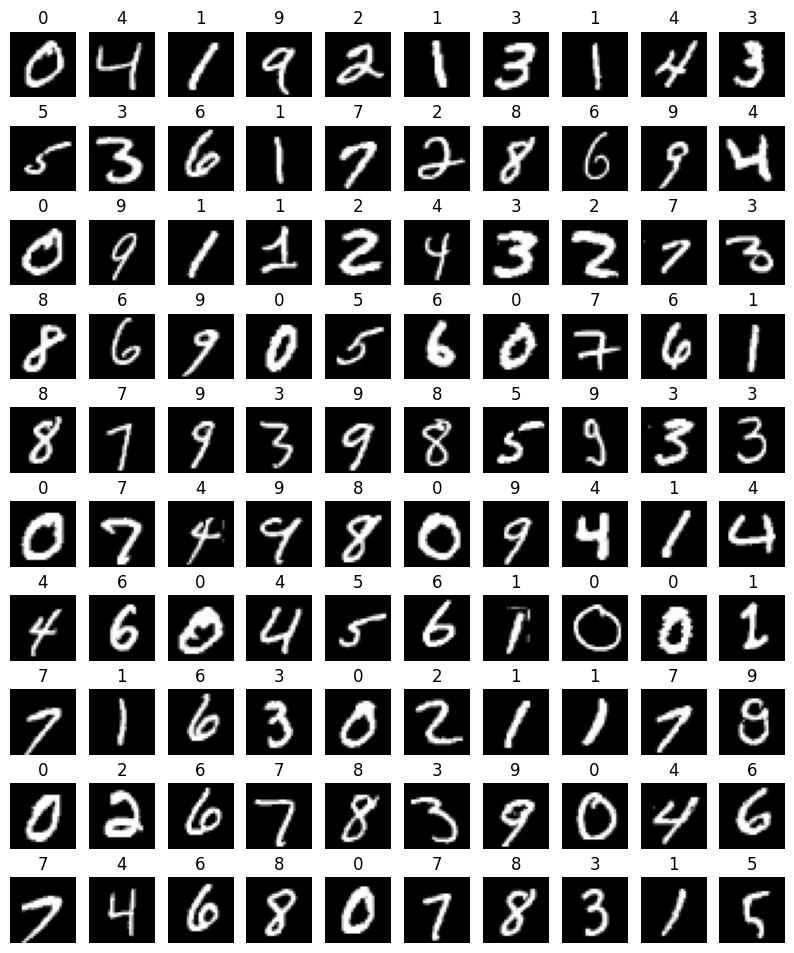

In [19]:
plt.figure(figsize=(10,12))
for i in range(1,101):
    plt.subplot(10,10,i)
    plt.imshow(x_train[i].reshape((28,28)),cmap = 'gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.subplots_adjust(hspace=0.2)
plt.show()

In [20]:
x_train = x_train.reshape(-1,28*28).astype("float32")/255.0
x_test = x_test.reshape(-1,784).astype("float32")/255.0

print(x_train.shape)

(60000, 784)


In [22]:
#Sequential API
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(128,activation='relu',name = 'first_layer'))
model.add(layers.Dense(32,activation='sigmoid',name = 'second_layer'))
model.add(layers.Dense(10,activation ='softmax'))


print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
model.fit(x_train,y_train,batch_size=32,epochs=5)
model.evaluate(x_test,y_test,batch_size = 32)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_layer (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8431 - loss: 0.6885
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9622 - loss: 0.1368
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9815 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9867 - loss: 0.0465
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9721 - loss: 0.0933   


[0.0816396027803421, 0.9750000238418579]

In [24]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step


In [28]:
np.argmax(pred[0])

7

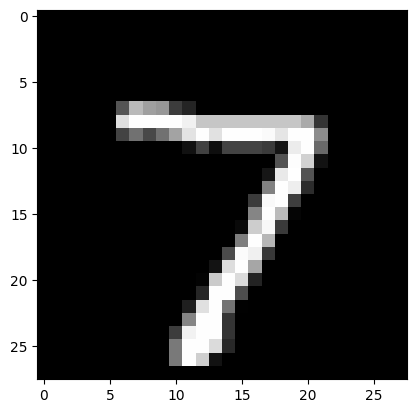

In [29]:
plt.imshow(x_test[0].reshape((28,28)),cmap = 'gray')
plt.show()

In [4]:
# Functional API (A bit more flexible)
inputs = keras.Input(shape = (784,))
x = layers.Dense(512,activation='relu',name = 'first_layer')(inputs)
x = layers.Dense(256,activation='relu',name = 'second_layer')(x)
outputs = layers.Dense(10,activation ='softmax')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
model.fit(x_train,y_train,batch_size=32,epochs=5)
model.evaluate(x_test,y_test,batch_size = 32)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_layer (Dense)                  │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9003 - loss: 0.3278
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9753 - loss: 0.0799
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9830 - loss: 0.0529
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9879 - loss: 0.0366
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9898 - loss: 0.0307
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.1055   


[0.08603756874799728, 0.9783999919891357]

In [19]:
np.argmax(model.predict(np.array([x_train[0]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


np.int64(5)